	 episode=400, t=16.0,	 total reward=-312.900
	 final x = 164.876,	 final y = -265.936,	 final z = -226.961


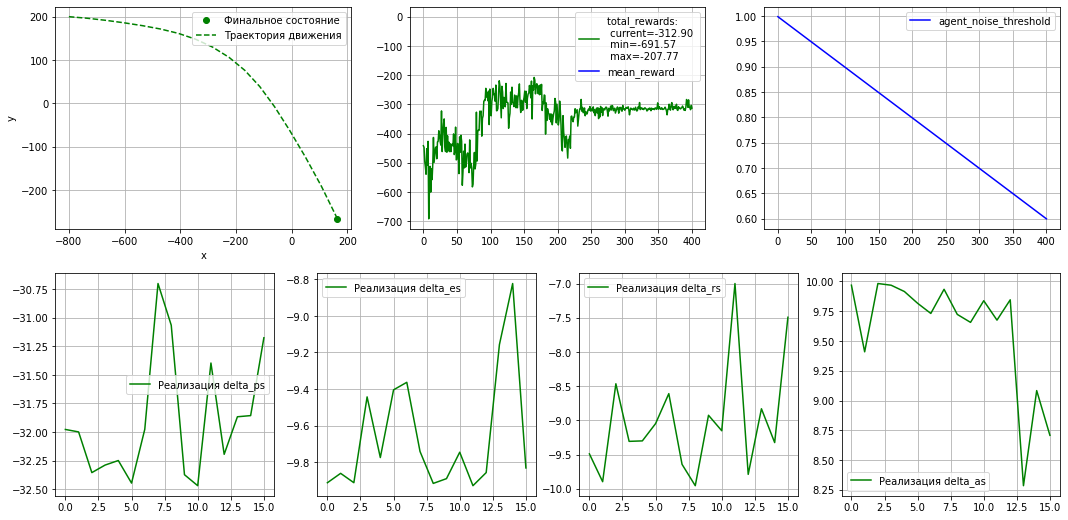

KeyboardInterrupt: 

In [5]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import torch.nn as nn
import time
import torch
from Environments.AircraftLanding.AircraftLanding import AircraftLanding
from Environments.AircraftLanding.AircraftLandingVisualizer import AircraftLandingVisualizer

from Agents.SAC import SAC
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.Utilities.Noises import OUNoise
from Solvers import OneAgentSolver as solver 
%load_ext autoreload
%autoreload 2

#learning parameters
episode_n = 1001

#environment initialization
env = AircraftLanding(dt=1, inner_step_n=10)

#agent initialization
q1_model = SequentialNetwork([env.state_dim + env.action_dim, 256, 128, 1], initial_weight_clip=1e-5)
q2_model = SequentialNetwork([env.state_dim + env.action_dim, 256, 128, 1], initial_weight_clip=1e-5)
pi_model = SequentialNetwork([env.state_dim, 256, 128, 2 * env.action_dim], output_n=2, initial_weight_clip=1e-5)
noise = OUNoise(action_dim=env.action_dim, threshold_decrease=1/episode_n)
agent = SAC(env.action_min, env.action_max, q1_model, q2_model, pi_model, noise,
             q_model_lr=1e-4, pi_model_lr=1e-4, gamma=1, batch_size=128, tau=1e-2, entropy_coef=1e-1)

#learning
visualizer = AircraftLandingVisualizer(waiting_for_show=50)
start_time = time.time()
solver.go(env, agent, episode_n=episode_n, show=visualizer.show)
print('time:', time.time() - start_time)